In [26]:
# =====================================
# Initialisierung: Benchmark Notebook
# =====================================

import os
import json
import logging
from pathlib import Path

import pandas as pd

# Logging konfigurieren
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    datefmt="%H:%M:%S"
)

# Hauptpfad: alle Modell-Ergebnisse liegen hier
BENCHMARK_PATH = Path(r"E:\Final_Github_1\MasterThesis_final\data\modelbenchmark\model_benchmark_results")

# Exportpfad für die zusammengeführten Tabellen
EXPORT_PATH = Path(r"E:\Final_Github_1\MasterThesis_final\data\modelbenchmark\model_benchmark_analysis")
EXPORT_PATH.mkdir(parents=True, exist_ok=True)

print("Initialisierung abgeschlossen")
print("Benchmark-Pfad:", BENCHMARK_PATH)
print("Export-Pfad:", EXPORT_PATH)


Initialisierung abgeschlossen
Benchmark-Pfad: E:\Final_Github_1\MasterThesis_final\data\modelbenchmark\model_benchmark_results
Export-Pfad: E:\Final_Github_1\MasterThesis_final\data\modelbenchmark\model_benchmark_analysis


In [27]:
# =====================================
# Benchmark-Tabelle: Full Fine-Tuning
# =====================================

import json
import pandas as pd

records = []
metrics_files = list(BENCHMARK_PATH.glob("*/*_metrics.json"))

for f in metrics_files:
    stem = f.stem.lower()
    if "few" in stem or "zero" in stem:
        continue  # überspringen
    
    with open(f, "r", encoding="utf-8") as infile:
        metrics = json.load(infile)
    
    model = f.parent.name  # Modellname = Ordner
    regime = "FT"  # alles andere = Full Fine-Tuning
    
    records.append({
        "Model": model,
        "Regime": regime,
        "Accuracy": metrics.get("accuracy"),
        "Macro-F1": metrics.get("macro_f1"),
        "Weighted-F1": metrics.get("weighted_f1"),
        "Precision (Macro)": metrics.get("precision_macro"),
        "Recall (Macro)": metrics.get("recall_macro"),
        "Inference Time / 1k": metrics.get("inference_time_per_1000"),
    })

df_ft = pd.DataFrame(records).reset_index(drop=True)

# Exportieren
out_path = EXPORT_PATH / "benchmark_table_ft.csv"
df_ft.to_csv(out_path, sep=";", index=False, encoding="utf-8-sig")

print("Benchmark-Tabelle (FT) erstellt")
display(df_ft)
print("Gespeichert unter:", out_path)


Benchmark-Tabelle (FT) erstellt


,Model,Regime,Accuracy,Macro-F1,Weighted-F1,Precision (Macro),Recall (Macro),Inference Time / 1k
0,flan-t5,FT,0.730370,0.681804,0.729545,0.684128,0.679611,141.918560
1,gbert,FT,0.764444,0.721908,0.764618,0.722764,0.721380,6.718816
2,llama-8b,FT,0.834074,0.800016,0.831149,0.821282,0.783629,200.162570
3,mistral-7b,FT,0.811852,0.587375,0.815886,0.597906,0.588371,203.955223
4,mt5,FT,0.730370,0.640258,0.708424,0.700268,0.631441,123.847887
5,xml-roberta,FT,0.742222,0.708204,0.747069,0.705161,0.722053,7.063217


Gespeichert unter: E:\Final_Github_1\MasterThesis_final\data\modelbenchmark\model_benchmark_analysis\benchmark_table_ft.csv


In [28]:
# =====================================
# Benchmark-Tabelle: Alle Regimes (Zero, Few, FT)
# =====================================

import json
import pandas as pd

records = []
metrics_files = list(BENCHMARK_PATH.glob("*/*_metrics.json"))

for f in metrics_files:
    stem = f.stem.lower()
    with open(f, "r", encoding="utf-8") as infile:
        metrics = json.load(infile)
    
    model = f.parent.name
    
    # Regime bestimmen
    if "zero" in stem:
        regime = "Zero-shot"
    elif "few" in stem:
        regime = "Few-shot"
    else:
        regime = "Fine-tuned"
    
    records.append({
        "Model": model,
        "Regime": regime,
        "Accuracy": metrics.get("accuracy"),
        "Macro-F1": metrics.get("macro_f1"),
        "Weighted-F1": metrics.get("weighted_f1"),
    })

df_all = pd.DataFrame(records)

# Sortierung: erst Modell, dann Reihenfolge Zero → Few → FT
regime_order = {"Zero-shot": 0, "Few-shot": 1, "Fine-tuned": 2}
df_all["RegimeOrder"] = df_all["Regime"].map(regime_order)
df_all = df_all.sort_values(by=["Model", "RegimeOrder"]).drop(columns="RegimeOrder")

# Exportieren
out_path = EXPORT_PATH / "benchmark_table_all_regimes.csv"
df_all.to_csv(out_path, sep=";", index=False, encoding="utf-8-sig")

print("Benchmark-Tabelle (Zero, Few, FT) erstellt")
display(df_all)
print("Gespeichert unter:", out_path)


Benchmark-Tabelle (Zero, Few, FT) erstellt


,Model,Regime,Accuracy,Macro-F1,Weighted-F1
0,flan-t5,Fine-tuned,0.730370,0.681804,0.729545
1,gbert,Fine-tuned,0.764444,0.721908,0.764618
3,gpt-4.1,Zero-shot,0.728889,0.505516,0.732645
2,gpt-4.1,Few-shot,0.733333,0.509428,0.737026
6,llama-8b,Zero-shot,0.715556,0.618404,0.697789
4,llama-8b,Few-shot,0.525926,0.469142,0.532255
5,llama-8b,Fine-tuned,0.834074,0.800016,0.831149
9,mistral-7b,Zero-shot,0.711111,0.675935,0.723168
7,mistral-7b,Few-shot,0.675556,0.646317,0.688739
8,mistral-7b,Fine-tuned,0.811852,0.587375,0.815886


Gespeichert unter: E:\Final_Github_1\MasterThesis_final\data\modelbenchmark\model_benchmark_analysis\benchmark_table_all_regimes.csv


In [29]:
# =====================================
# Benchmark-Tabelle: Class-specific F1 (nur Fine-tuned)
# =====================================

records = []
metrics_files = list(BENCHMARK_PATH.glob("*/*_metrics.json"))

for f in metrics_files:
    stem = f.stem.lower()
    # Nur Fine-tuned Ergebnisse behalten
    if "zero" in stem or "few" in stem:
        continue

    with open(f, "r", encoding="utf-8") as infile:
        metrics = json.load(infile)
    
    model = f.parent.name
    regime = "Fine-tuned"

    # Class-specific F1
    per_class = metrics.get("per_class_f1", {})

    records.append({
        "Model": model,
        "Regime": regime,
        "F1-Support": per_class.get("Zustimmung"),
        "F1-Opposition": per_class.get("Ablehnung"),
        "F1-Neutral": per_class.get("Neutral"),
    })

df_ft_classes = pd.DataFrame(records)

# Sortieren nach Model
df_ft_classes = df_ft_classes.sort_values(by="Model")

# Export
out_path = EXPORT_PATH / "benchmark_table_class_f1_finetuned.csv"
df_ft_classes.to_csv(out_path, sep=";", index=False, encoding="utf-8-sig")

print("Class-specific F1 Tabelle (nur Fine-tuned) erstellt")
display(df_ft_classes)
print("Gespeichert unter:", out_path)


Class-specific F1 Tabelle (nur Fine-tuned) erstellt


,Model,Regime,F1-Support,F1-Opposition,F1-Neutral
0,flan-t5,Fine-tuned,0.648649,0.812821,0.583942
1,gbert,Fine-tuned,0.700680,0.838710,0.626335
2,llama-8b,Fine-tuned,0.792857,0.884758,0.722433
3,mistral-7b,Fine-tuned,0.779026,0.872063,0.698413
4,mt5,Fine-tuned,0.677524,0.823250,0.420000
5,xml-roberta,Fine-tuned,0.675958,0.815115,0.633540


Gespeichert unter: E:\Final_Github_1\MasterThesis_final\data\modelbenchmark\model_benchmark_analysis\benchmark_table_class_f1_finetuned.csv


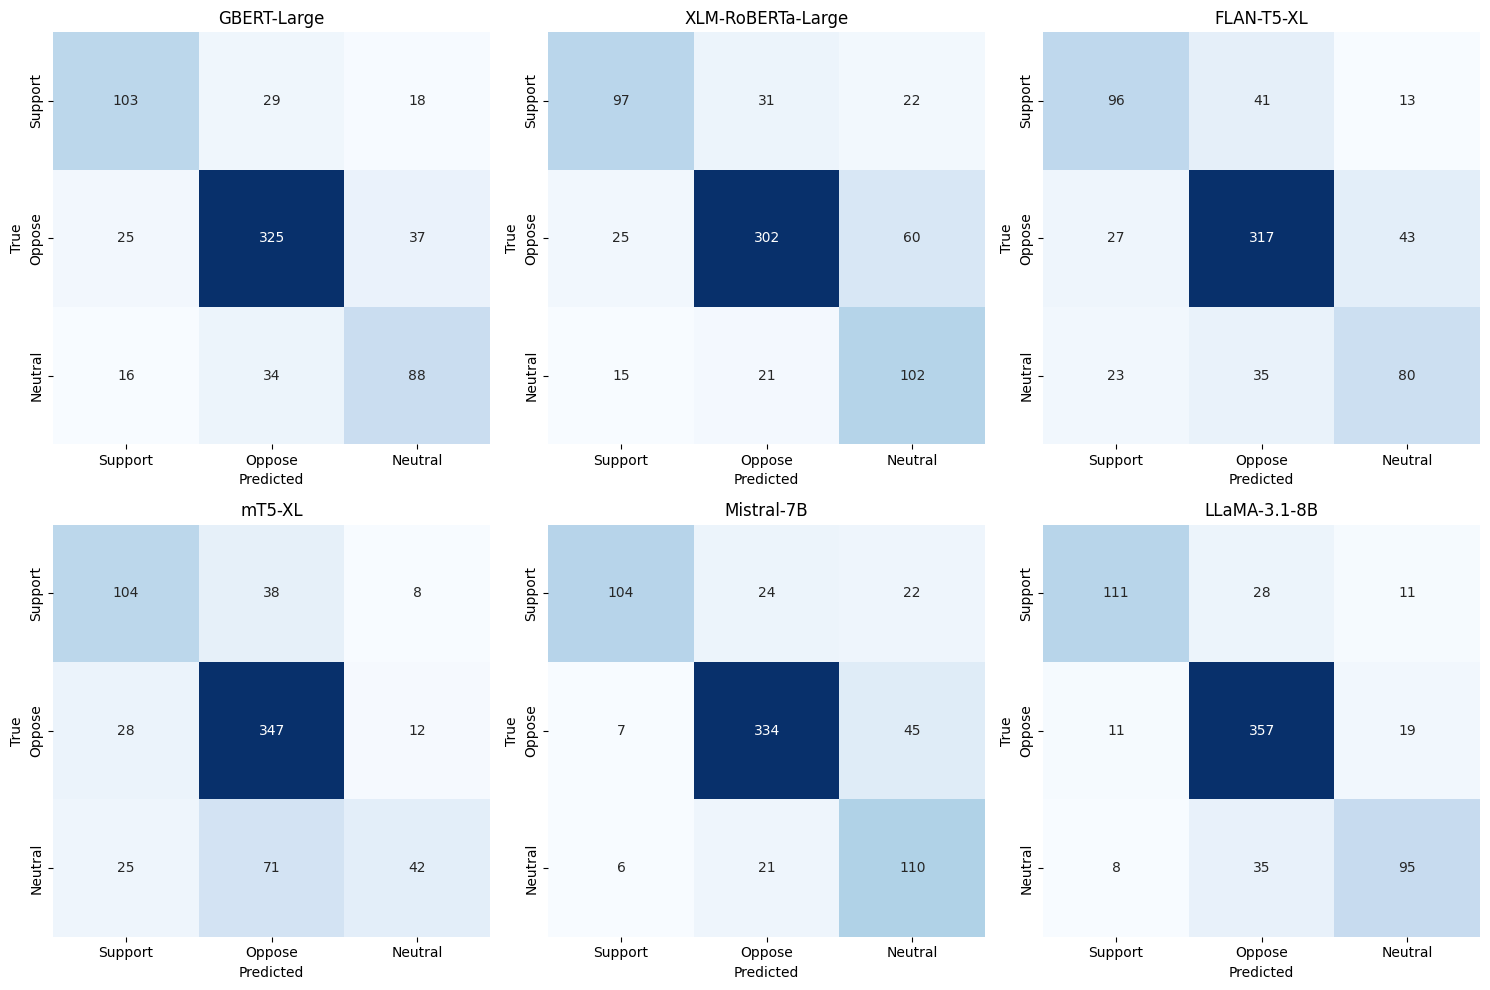

Confusion Matrices gespeichert unter: E:\Final_Github_1\MasterThesis_final\data\modelbenchmark\model_benchmark_analysis\confusion_matrices_finetuned_en_ordered.png


In [30]:
# =====================================
# Confusion Matrices (Fine-tuned, englische Labels, feste Reihenfolge)
# =====================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Mapping auf englische Labels
label_map = {
    "Zustimmung": "Support",
    "Ablehnung": "Oppose",
    "Neutral": "Neutral"
}
labels_en = ["Support", "Oppose", "Neutral"]

# Definiere Reihenfolge und hübsche Namen
model_order = {
    "gbert": "GBERT-Large",
    "xml-roberta": "XLM-RoBERTa-Large",
    "flan-t5": "FLAN-T5-XL",
    "mt5": "mT5-XL",
    "mistral-7b": "Mistral-7B",
    "llama-8b": "LLaMA-3.1-8B"
}

# Finde alle *_preds.csv ohne few/zero
pred_files = {f.parent.name: f for f in BENCHMARK_PATH.glob("*/*_preds.csv") 
              if "zero" not in f.stem.lower() and "few" not in f.stem.lower()}

# Plot
cols = 3
rows = (len(model_order) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))

for ax, (folder, display_name) in zip(axes.flatten(), model_order.items()):
    if folder not in pred_files:
        ax.axis("off")
        continue

    f = pred_files[folder]
    df = pd.read_csv(f, sep=";", encoding="utf-8-sig")

    # Labels ins Englische mappen
    df["label_en"] = df["label"].map(label_map)
    df["pred_en"]  = df["pred"].map(label_map)
    df = df.dropna(subset=["label_en", "pred_en"])

    # Confusion Matrix
    cm = confusion_matrix(df["label_en"], df["pred_en"], labels=labels_en)
    cm_df = pd.DataFrame(cm, index=labels_en, columns=labels_en)

    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(display_name, fontsize=12)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

# Leere Achsen ausschalten
for ax in axes.flatten()[len(model_order):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

# Speichern
out_path = EXPORT_PATH / "confusion_matrices_finetuned_en_ordered.png"
fig.savefig(out_path, dpi=300, bbox_inches="tight")
print("Confusion Matrices gespeichert unter:", out_path)

